# MadMiner debugging

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
%load_ext line_profiler

from madminer.goldmine import GoldMine
from madminer.tools.plots import plot_2d_morphing_basis
from delphesprocessor.delphesprocessor import DelphesProcessor
from madminer.refinery import combine_and_shuffle
from madminer.refinery import Refinery
from madminer.refinery import constant_benchmark_theta, multiple_benchmark_thetas
from madminer.refinery import constant_morphing_theta, multiple_morphing_thetas, random_morphing_thetas
from forge.forge import Forge
from forge.ml.ratio_trainer import train_model
from forge.ml.models import ParameterizedRatioEstimator, DoublyParameterizedRatioEstimator


## Debug refinery

In [8]:
refinery = Refinery('data/madminer_example_shuffled.h5', debug=True)

17:12  
17:12  ------------------------------------------------------------
17:12  |                                                          |
17:12  |  MadMiner                                                |
17:12  |                                                          |
17:12  |  Version from July 31, 2018                              |
17:12  |                                                          |
17:12  |           Johann Brehmer, Kyle Cranmer, and Felix Kling  |
17:12  |                                                          |
17:12  ------------------------------------------------------------
17:12  
17:12  Loading data from data/madminer_example_shuffled.h5
17:12  Found 2 parameters:
17:12     CWL2 (LHA: dim6 2, maximal power in squared ME: 2, range: (-50.0, 50.0))
17:12     CPWL2 (LHA: dim6 5, maximal power in squared ME: 2, range: (-50.0, 50.0))
17:12  Found 6 benchmarks:
17:12     sm: CWL2 = 0.00e+00, CPWL2 = 0.00e+00
17:12     w: CWL2 = 20.00, CPWL2 = 0.00e+00


In [3]:
x, theta0, theta1, y, r_xz, t_xz0 = refinery.extract_samples_train_ratio(
    theta0=random_morphing_thetas(100, [('gaussian', 0., 50.), ('gaussian', 0., 50.)]),
    theta1=constant_morphing_theta([0.,0.]),
    n_samples=10000,
    folder='./data/samples',
    filename='train1'
)

11:19  Extracting training sample for ratio-based methods. Numerator hypothesis: ('random', (100, [('gaussian', 0.0, 50.0), ('gaussian', 0.0, 50.0)])), denominator hypothesis: ('theta', array([0., 0.]))
11:19  Total n_samples: 5000, n_benchmarks: 100, n_samples_per_theta: 50
11:19  Starting sample extraction
11:19  Augmented data requested:
11:19    ('ratio', 0, 1)
11:19    ('score', 0)
11:19  Benchmark cross sections [pb]: [0.00042997 0.00035584 0.00069696 0.0006738  0.00115805 0.00118698]
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [-37.66971476  77.7848811 ] (sampling)
11:19    theta 1 = [0. 0.]
11:19    Cumulative probability (should be close to 1): 1.0000300133944664
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [-13.79234455  51.50621328] (sampling)
11:19    theta 1 = [0. 0.]
11:19    Cumulative probability (should be close to 1): 1.000025756613023
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [-40.35362674

11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [ -4.66293187 -75.01959654] (sampling)
11:19    theta 1 = [0. 0.]
11:19    Cumulative probability (should be close to 1): 1.0000084476140694
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [27.56704418  6.38929264] (sampling)
11:19    theta 1 = [0. 0.]
11:19    Cumulative probability (should be close to 1): 1.0000059861472121
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [-44.34684647 -56.73478318] (sampling)
11:19    theta 1 = [0. 0.]
11:19    Cumulative probability (should be close to 1): 0.9999452619828574
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [-52.89764565 -14.14486353] (sampling)
11:19    theta 1 = [0. 0.]
11:19    Cumulative probability (should be close to 1): 0.9999206624021136
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [25.76394916  9.33869554] (sampling)
11:19    theta 1 = [0. 0.]
11:19    Cumulative prob

11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [ 37.29011943 -16.61772453] (sampling)
11:19    theta 1 = [0. 0.]
11:19    Cumulative probability (should be close to 1): 1.0000246672089836
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [-17.11517544 -13.65896866] (sampling)
11:19    theta 1 = [0. 0.]
11:19    Cumulative probability (should be close to 1): 0.9999324664566327
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [ 41.66091612 -39.9891647 ] (sampling)
11:19    theta 1 = [0. 0.]
11:19    Cumulative probability (should be close to 1): 1.0000416271276436
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [13.95980744 60.6791149 ] (sampling)
11:19    theta 1 = [0. 0.]
11:19    Cumulative probability (should be close to 1): 1.0000361263607171
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [ 59.5613442  -36.21452298] (sampling)
11:19    theta 1 = [0. 0.]
11:19    Cumulative pr

11:19    Cumulative probability (should be close to 1): 0.9999610930609123
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [44.66080178  8.48223082]
11:19    theta 1 = [0. 0.] (sampling)
11:19    Cumulative probability (should be close to 1): 0.9999610930609123
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [-36.64551662 -55.10935633]
11:19    theta 1 = [0. 0.] (sampling)
11:19    Cumulative probability (should be close to 1): 0.9999610930609123
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [ 78.62881904 -43.53899702]
11:19    theta 1 = [0. 0.] (sampling)
11:19    Cumulative probability (should be close to 1): 0.9999610930609123
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [ 9.39201585 50.18306075]
11:19    theta 1 = [0. 0.] (sampling)
11:19    Cumulative probability (should be close to 1): 0.9999610930609123
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [20.98940098 -3

11:19    Cumulative probability (should be close to 1): 0.9999610930609123
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [21.75648465 70.83976065]
11:19    theta 1 = [0. 0.] (sampling)
11:19    Cumulative probability (should be close to 1): 0.9999610930609123
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [-39.26594397   1.16372987]
11:19    theta 1 = [0. 0.] (sampling)
11:19    Cumulative probability (should be close to 1): 0.9999610930609123
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [ 31.68958059 121.02558836]
11:19    theta 1 = [0. 0.] (sampling)
11:19    Cumulative probability (should be close to 1): 0.9999610930609123
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [-4.43612738  4.45687893]
11:19    theta 1 = [0. 0.] (sampling)
11:19    Cumulative probability (should be close to 1): 0.9999610930609123
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [3.49141695 3.8

11:19    Cumulative probability (should be close to 1): 0.9999610930609123
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [-92.92423103 -24.66651903]
11:19    theta 1 = [0. 0.] (sampling)
11:19    Cumulative probability (should be close to 1): 0.9999610930609123
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [ 3.04683264 31.93230351]
11:19    theta 1 = [0. 0.] (sampling)
11:19    Cumulative probability (should be close to 1): 0.9999610930609123
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [ 31.83554919 -25.94979165]
11:19    theta 1 = [0. 0.] (sampling)
11:19    Cumulative probability (should be close to 1): 0.9999610930609123
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [-39.52458018  78.85571782]
11:19    theta 1 = [0. 0.] (sampling)
11:19    Cumulative probability (should be close to 1): 0.9999610930609123
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [-61.95820289

In [9]:
x, theta0, theta1, y, r_xz, t_xz0, t_xz1 = refinery.extract_samples_train_more_ratios(
    theta0=random_morphing_thetas(100, [('gaussian', 0., 50.), ('gaussian', 0., 50.)]),
    theta1=random_morphing_thetas(100, [('gaussian', 0., 50.), ('gaussian', 0., 50.)]),
    #additional_thetas=[random_morphing_thetas(100, [('gaussian', 0., 50.), ('gaussian', 0., 50.)]) for _ in range(4)],
    n_samples=10000,
    folder='./data/samples',
    filename='train2'
)

17:12  Extracting training sample for ratio-based methods. Numerator hypothesis: ('random', (100, [('gaussian', 0.0, 50.0), ('gaussian', 0.0, 50.0)])), denominator hypothesis: ('random', (100, [('gaussian', 0.0, 50.0), ('gaussian', 0.0, 50.0)]))
17:12  Total n_samples: 5000, n_benchmarks: 100, n_samples_per_theta: 50
17:12  Total n_samples: 5000, n_benchmarks: 100, n_samples_per_theta: 50
17:12  Starting sample extraction
17:12  Augmented data requested:
17:12    ('ratio', 0, 1)
17:12    ('score', 0)
17:12    ('score', 1)
17:12  Benchmark cross sections [pb]: [0.00042997 0.00035584 0.00069696 0.0006738  0.00115805 0.00118698]
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [19.07881047  5.62694084] (sampling)
17:12    theta 1 = [37.60101221  7.78449222]
17:12    Cumulative probability (should be close to 1): 1.000000299067119
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [-39.85707209  27.04022947] (sampling)
17:12    theta 1 = [-0.10220541

17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [68.98325992 88.80896902] (sampling)
17:12    theta 1 = [ 60.02951664 114.80014636]
17:12    Cumulative probability (should be close to 1): 1.0000002149698097
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [-25.24818923 -24.56679869] (sampling)
17:12    theta 1 = [-1.31723469  9.19887903]
17:12    Cumulative probability (should be close to 1): 0.9999311609974194
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [ 51.24444596 -75.1958757 ] (sampling)
17:12    theta 1 = [-48.24778812  41.6212242 ]
17:12    Cumulative probability (should be close to 1): 1.0000502774499556
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [62.63739438 10.89494136] (sampling)
17:12    theta 1 = [-16.79791075  -4.11294241]
17:12    Cumulative probability (should be close to 1): 0.9999828739163233
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [-34.9185888

17:12    Cumulative probability (should be close to 1): 0.9999320905437422
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [-27.396962   -41.14560474] (sampling)
17:12    theta 1 = [ 14.04239582 -32.35266652]
17:12    Cumulative probability (should be close to 1): 0.9999455870375792
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [72.12706022 21.1544838 ] (sampling)
17:12    theta 1 = [ 71.45503075 -29.30644311]
17:12    Cumulative probability (should be close to 1): 0.9999734763374925
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [ -3.41878185 148.75656497] (sampling)
17:12    theta 1 = [ -7.05161768 -43.18752463]
17:12    Cumulative probability (should be close to 1): 1.0000475310543688
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [ 2.86041945 97.01021034] (sampling)
17:12    theta 1 = [-41.67848418  -9.69482487]
17:12    Cumulative probability (should be close to 1): 1.000044476298344
17:12 

17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [ 45.59421491 -54.58663444]
17:12    theta 1 = [-4.96550846 64.56642709] (sampling)
17:12    Cumulative probability (should be close to 1): 1.0000378577420408
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [ 81.6169695  -40.45021084]
17:12    theta 1 = [-65.95899095  75.52396253] (sampling)
17:12    Cumulative probability (should be close to 1): 1.000012619303226
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [-55.05113723 -10.85436353]
17:12    theta 1 = [-45.56887426  28.39152194] (sampling)
17:12    Cumulative probability (should be close to 1): 0.9999701826886271
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [117.11070703  93.7766129 ]
17:12    theta 1 = [-32.67464335  -3.89894566] (sampling)
17:12    Cumulative probability (should be close to 1): 0.9999277062552726
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [ 23.1235

17:12    theta 1 = [-15.24539781  43.80151354] (sampling)
17:12    Cumulative probability (should be close to 1): 1.0000168785995278
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [-93.10811881  64.17473976]
17:12    theta 1 = [ 44.37998894 -12.83635179] (sampling)
17:12    Cumulative probability (should be close to 1): 1.0000183027509206
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [17.64141597 48.77329428]
17:12    theta 1 = [ 67.16383108 -48.54251501] (sampling)
17:12    Cumulative probability (should be close to 1): 1.0000362762538426
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [-28.83147843 -60.76374824]
17:12    theta 1 = [-18.85922627 -90.51452603] (sampling)
17:12    Cumulative probability (should be close to 1): 0.9999994282510816
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [-0.3748677  81.51131983]
17:12    theta 1 = [43.92833919 25.14573296] (sampling)
17:12    Cumulative prob

17:12    theta 0 = [ 8.02361906 90.35020226]
17:12    theta 1 = [63.56992459 32.45650475] (sampling)
17:12    Cumulative probability (should be close to 1): 0.9999802579289016
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [-84.69843532 -43.40841466]
17:12    theta 1 = [-24.71530633 -36.01449002] (sampling)
17:12    Cumulative probability (should be close to 1): 0.9999429038582175
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [ 17.09043666 -94.20464606]
17:12    theta 1 = [-19.30257497  69.65606782] (sampling)
17:12    Cumulative probability (should be close to 1): 1.0000349057579747
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [ 10.12369283 -41.43109276]
17:12    theta 1 = [33.50833375 54.21146843] (sampling)
17:12    Cumulative probability (should be close to 1): 1.0000210337180337
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [-34.931632   -50.87314666]
17:12    theta 1 = [-19.41485501  6

In [5]:
x, theta = refinery.extract_samples_test(
    theta=constant_benchmark_theta('sm'),
    n_samples=10000,
    folder='./data/samples',
    filename='test'
)

11:19  Extracting evaluation sample. Sampling according to ('benchmark', 'sm')
11:19  Starting sample extraction
11:19  Augmented data requested:
11:19  Benchmark cross sections [pb]: [0.00018426 0.000164   0.00037822 0.00029139 0.00050157 0.00058414]
11:19  Drawing 10000 events for the following thetas:
11:19    theta 0 = [0. 0.] (sampling)
11:19    Cumulative probability (should be close to 1): 0.9999635413904359


## Debug Forge

In [2]:
forge = Forge(debug=True)

17:24  
17:24  ------------------------------------------------------------
17:24  |                                                          |
17:24  |  Forge                                                   |
17:24  |                                                          |
17:24  |  Version from July 31, 2018                              |
17:24  |                                                          |
17:24  |           Johann Brehmer, Kyle Cranmer, and Felix Kling  |
17:24  |                                                          |
17:24  ------------------------------------------------------------
17:24  


In [10]:
forge.train(
    method='carl',
    theta0_filename='data/samples/theta0_train1.npy',
    x_filename='data/samples/x_train1.npy',
    y_filename='data/samples/y_train1.npy',
    n_epochs=1,
    batch_size=256,
    validation_split=None
)

forge.save('models/carl')

15:31  Starting training
15:31    Method:                 carl
15:31    Training data: theta0 at data/samples/theta0_train1.npy
15:31                   x at data/samples/x_train1.npy
15:31                   y at data/samples/y_train1.npy
15:31    Method:                 carl
15:31    Hidden layers:          (100, 100, 100)
15:31    Activation function:    tanh
15:31    alpha:                  1.0
15:31    Batch size:             64
15:31    Epochs:                 1
15:31    Learning rate:          0.001 initially, decaying to 0.0001
15:31    Early stopping:         True
15:31  Loading training data
15:31  Found 10000 samples with 2 parameters and 2 observables
15:31  Creating model for method carl
15:31  Training model
15:31    Epoch 1: train loss 0.64 ([0.6383811])
15:31  Finished training
15:31  Saving settings to models/carl_settings.json
15:31  Saving state dictionary to models/carl_state_dict.pt


In [10]:
forge.train(
    method='alice',
    theta0_filename='data/samples/theta0_train1.npy',
    x_filename='data/samples/x_train1.npy',
    y_filename='data/samples/y_train1.npy',
    r_xz_filename='data/samples/r_xz_train1.npy',
    alpha=100.,
    n_epochs=5,
    batch_size=256, \
    validation_split=None
)

forge.save('models/alice')

11:22  Starting training
11:22    Method:                 alice
11:22    Training data: theta0 at data/samples/theta0_train1.npy
11:22                   x at data/samples/x_train1.npy
11:22                   y at data/samples/y_train1.npy
11:22                   r_xz at data/samples/r_xz_train1.npy
11:22    Method:                 alice
11:22    Hidden layers:          (100, 100, 100)
11:22    Activation function:    tanh
11:22    alpha:                  100.0
11:22    Batch size:             64
11:22    Epochs:                 5
11:22    Learning rate:          0.001 initially, decaying to 0.0001
11:22    Early stopping:         True
11:22  Loading training data
11:22  Found 10000 samples with 2 parameters and 2 observables
11:22  Creating model for method alice
11:22  Training model
11:23    Epoch 1: train loss 0.62 ([0.61824367])
11:23    Epoch 2: train loss 0.59 ([0.58861098])
11:24    Epoch 3: train loss 0.57 ([0.57278967])
11:24    Epoch 4: train loss 0.56 ([0.56357344])
11:24   

In [18]:
#%lprun -f train_model forge.train( \
%lprun -f ParameterizedRatioEstimator.forward forge.train( \
    method='rascal', \
    theta0_filename='data/samples/theta0_train1.npy', \
    x_filename='data/samples/x_train1.npy', \
    y_filename='data/samples/y_train1.npy', \
    r_xz_filename='data/samples/r_xz_train1.npy', \
    t_xz0_filename='data/samples/t_xz_train1.npy', \
    alpha=100., \
    n_epochs=1, \
    batch_size=256, \
    validation_split=None \
)

forge.save('models/rascal')

16:24  Starting training
16:24    Method:                 rascal
16:24    Training data: theta0 at data/samples/theta0_train1.npy
16:24                   x at data/samples/x_train1.npy
16:24                   y at data/samples/y_train1.npy
16:24                   r_xz at data/samples/r_xz_train1.npy
16:24                   t_xz (theta0) at  data/samples/t_xz_train1.npy
16:24    Method:                 rascal
16:24    Hidden layers:          (100, 100, 100)
16:24    Activation function:    tanh
16:24    alpha:                  100.0
16:24    Batch size:             256
16:24    Epochs:                 1
16:24    Learning rate:          0.001 initially, decaying to 0.0001
16:24    Early stopping:         True
16:24  Loading training data
16:24  Found 10000 samples with 2 parameters and 2 observables
16:24  Creating model for method rascal
16:24  Training model
16:24    Epoch 1: train loss 484.90 ([4.84864781e+02 3.42664705e-04])
16:24  Finished training
16:24  Saving settings to models/r

In [3]:
#%lprun -f train_model forge.train( \
%lprun -f DoublyParameterizedRatioEstimator.forward forge.train( \
    method='rascal2', \
    theta0_filename='data/samples/theta0_train2.npy', \
    theta1_filename='data/samples/theta1_train2.npy', \
    x_filename='data/samples/x_train2.npy', \
    y_filename='data/samples/y_train2.npy', \
    r_xz_filename='data/samples/r_xz_train2.npy', \
    t_xz0_filename='data/samples/t_xz0_train2.npy', \
    t_xz1_filename='data/samples/t_xz1_train2.npy', \
    alpha=100., \
    batch_size=256, \
    n_epochs=1, \
    validation_split=None \
)

forge.save('models/rascal2')

17:24  Starting training
17:24    Method:                 rascal2
17:24    Training data: theta0 at data/samples/theta0_train2.npy
17:24                   theta1 at data/samples/theta1_train2.npy
17:24                   x at data/samples/x_train2.npy
17:24                   y at data/samples/y_train2.npy
17:24                   r_xz at data/samples/r_xz_train2.npy
17:24                   t_xz (theta0) at  data/samples/t_xz0_train2.npy
17:24                   t_xz (theta1) at  data/samples/t_xz1_train2.npy
17:24    Method:                 rascal2
17:24    Hidden layers:          (100, 100, 100)
17:24    Activation function:    tanh
17:24    alpha:                  100.0
17:24    Batch size:             256
17:24    Epochs:                 1
17:24    Learning rate:          0.001 initially, decaying to 0.0001
17:24    Early stopping:         True
17:24  Loading training data
17:24  Found 10000 samples with 2 parameters and 2 observables
17:24  Creating model for method rascal2
17:24  Tra

In [17]:
theta_each = np.linspace(-100.,100.,21)
theta0, theta1 = np.meshgrid(theta_each, theta_each)
theta_grid = np.vstack((theta0.flatten(), theta1.flatten())).T
np.save('data/samples/theta_grid.npy', theta_grid)

theta_denom = np.array([[0.,0.]])
np.save('data/samples/theta_ref.npy', theta_denom)


In [18]:
models = ['carl', 'alice', 'rascal', 'rascal2']
lr_train = []
expected_llr_test = []

for model in models:
    forge.load('models/' + model)

    this_log_r_hat_train, _, _ = forge.evaluate(
        theta0_filename='data/samples/theta0_train1.npy',
        theta1_filename='data/samples/theta1_train1.npy',
        x_filename='data/samples/x_train1.npy',
        test_all_combinations=False
    )

    this_log_r_hat_test, _, _ = forge.evaluate(
        theta0_filename='data/samples/theta_grid.npy',
        theta1_filename='data/samples/theta_ref.npy',
        x_filename='data/samples/x_test.npy',
    )
    
    lr_train.append(this_log_r_hat_train.flatten())
    expected_llr_test.append(np.mean(this_log_r_hat_test, axis=1))


14:08  Loading settings from models/carl_settings.json
14:08  Loading state dictionary from models/carl_state_dict.pt
14:08  Loading evaluation data
14:08  Starting evaluation for all thetas
14:08  Loading evaluation data
14:08  Starting evaluation for thetas 1 / 441: [-100. -100.] vs [0. 0.]
14:08  Starting evaluation for thetas 2 / 441: [ -90. -100.] vs [0. 0.]
14:08  Starting evaluation for thetas 3 / 441: [ -80. -100.] vs [0. 0.]
14:08  Starting evaluation for thetas 4 / 441: [ -70. -100.] vs [0. 0.]
14:08  Starting evaluation for thetas 5 / 441: [ -60. -100.] vs [0. 0.]
14:08  Starting evaluation for thetas 6 / 441: [ -50. -100.] vs [0. 0.]
14:08  Starting evaluation for thetas 7 / 441: [ -40. -100.] vs [0. 0.]
14:08  Starting evaluation for thetas 8 / 441: [ -30. -100.] vs [0. 0.]
14:08  Starting evaluation for thetas 9 / 441: [ -20. -100.] vs [0. 0.]
14:08  Starting evaluation for thetas 10 / 441: [ -10. -100.] vs [0. 0.]
14:08  Starting evaluation for thetas 11 / 441: [   0. -1

14:09  Starting evaluation for thetas 113 / 441: [-30. -50.] vs [0. 0.]
14:09  Starting evaluation for thetas 114 / 441: [-20. -50.] vs [0. 0.]
14:09  Starting evaluation for thetas 115 / 441: [-10. -50.] vs [0. 0.]
14:09  Starting evaluation for thetas 116 / 441: [  0. -50.] vs [0. 0.]
14:09  Starting evaluation for thetas 117 / 441: [ 10. -50.] vs [0. 0.]
14:09  Starting evaluation for thetas 118 / 441: [ 20. -50.] vs [0. 0.]
14:09  Starting evaluation for thetas 119 / 441: [ 30. -50.] vs [0. 0.]
14:09  Starting evaluation for thetas 120 / 441: [ 40. -50.] vs [0. 0.]
14:09  Starting evaluation for thetas 121 / 441: [ 50. -50.] vs [0. 0.]
14:09  Starting evaluation for thetas 122 / 441: [ 60. -50.] vs [0. 0.]
14:10  Starting evaluation for thetas 123 / 441: [ 70. -50.] vs [0. 0.]
14:10  Starting evaluation for thetas 124 / 441: [ 80. -50.] vs [0. 0.]
14:10  Starting evaluation for thetas 125 / 441: [ 90. -50.] vs [0. 0.]
14:10  Starting evaluation for thetas 126 / 441: [100. -50.] vs 

14:10  Starting evaluation for thetas 227 / 441: [60.  0.] vs [0. 0.]
14:10  Starting evaluation for thetas 228 / 441: [70.  0.] vs [0. 0.]
14:10  Starting evaluation for thetas 229 / 441: [80.  0.] vs [0. 0.]
14:11  Starting evaluation for thetas 230 / 441: [90.  0.] vs [0. 0.]
14:11  Starting evaluation for thetas 231 / 441: [100.   0.] vs [0. 0.]
14:11  Starting evaluation for thetas 232 / 441: [-100.   10.] vs [0. 0.]
14:11  Starting evaluation for thetas 233 / 441: [-90.  10.] vs [0. 0.]
14:11  Starting evaluation for thetas 234 / 441: [-80.  10.] vs [0. 0.]
14:11  Starting evaluation for thetas 235 / 441: [-70.  10.] vs [0. 0.]
14:11  Starting evaluation for thetas 236 / 441: [-60.  10.] vs [0. 0.]
14:11  Starting evaluation for thetas 237 / 441: [-50.  10.] vs [0. 0.]
14:11  Starting evaluation for thetas 238 / 441: [-40.  10.] vs [0. 0.]
14:11  Starting evaluation for thetas 239 / 441: [-30.  10.] vs [0. 0.]
14:11  Starting evaluation for thetas 240 / 441: [-20.  10.] vs [0. 0.

14:12  Starting evaluation for thetas 343 / 441: [-40.  60.] vs [0. 0.]
14:12  Starting evaluation for thetas 344 / 441: [-30.  60.] vs [0. 0.]
14:12  Starting evaluation for thetas 345 / 441: [-20.  60.] vs [0. 0.]
14:12  Starting evaluation for thetas 346 / 441: [-10.  60.] vs [0. 0.]
14:12  Starting evaluation for thetas 347 / 441: [ 0. 60.] vs [0. 0.]
14:12  Starting evaluation for thetas 348 / 441: [10. 60.] vs [0. 0.]
14:12  Starting evaluation for thetas 349 / 441: [20. 60.] vs [0. 0.]
14:12  Starting evaluation for thetas 350 / 441: [30. 60.] vs [0. 0.]
14:12  Starting evaluation for thetas 351 / 441: [40. 60.] vs [0. 0.]
14:12  Starting evaluation for thetas 352 / 441: [50. 60.] vs [0. 0.]
14:12  Starting evaluation for thetas 353 / 441: [60. 60.] vs [0. 0.]
14:12  Starting evaluation for thetas 354 / 441: [70. 60.] vs [0. 0.]
14:12  Starting evaluation for thetas 355 / 441: [80. 60.] vs [0. 0.]
14:12  Starting evaluation for thetas 356 / 441: [90. 60.] vs [0. 0.]
14:12  Start

14:13  Starting evaluation for thetas 14 / 441: [  30. -100.] vs [0. 0.]
14:13  Starting evaluation for thetas 15 / 441: [  40. -100.] vs [0. 0.]
14:13  Starting evaluation for thetas 16 / 441: [  50. -100.] vs [0. 0.]
14:13  Starting evaluation for thetas 17 / 441: [  60. -100.] vs [0. 0.]
14:13  Starting evaluation for thetas 18 / 441: [  70. -100.] vs [0. 0.]
14:13  Starting evaluation for thetas 19 / 441: [  80. -100.] vs [0. 0.]
14:13  Starting evaluation for thetas 20 / 441: [  90. -100.] vs [0. 0.]
14:13  Starting evaluation for thetas 21 / 441: [ 100. -100.] vs [0. 0.]
14:13  Starting evaluation for thetas 22 / 441: [-100.  -90.] vs [0. 0.]
14:13  Starting evaluation for thetas 23 / 441: [-90. -90.] vs [0. 0.]
14:13  Starting evaluation for thetas 24 / 441: [-80. -90.] vs [0. 0.]
14:13  Starting evaluation for thetas 25 / 441: [-70. -90.] vs [0. 0.]
14:13  Starting evaluation for thetas 26 / 441: [-60. -90.] vs [0. 0.]
14:13  Starting evaluation for thetas 27 / 441: [-50. -90.]

14:14  Starting evaluation for thetas 129 / 441: [-80. -40.] vs [0. 0.]
14:14  Starting evaluation for thetas 130 / 441: [-70. -40.] vs [0. 0.]
14:14  Starting evaluation for thetas 131 / 441: [-60. -40.] vs [0. 0.]
14:14  Starting evaluation for thetas 132 / 441: [-50. -40.] vs [0. 0.]
14:14  Starting evaluation for thetas 133 / 441: [-40. -40.] vs [0. 0.]
14:14  Starting evaluation for thetas 134 / 441: [-30. -40.] vs [0. 0.]
14:14  Starting evaluation for thetas 135 / 441: [-20. -40.] vs [0. 0.]
14:14  Starting evaluation for thetas 136 / 441: [-10. -40.] vs [0. 0.]
14:14  Starting evaluation for thetas 137 / 441: [  0. -40.] vs [0. 0.]
14:14  Starting evaluation for thetas 138 / 441: [ 10. -40.] vs [0. 0.]
14:14  Starting evaluation for thetas 139 / 441: [ 20. -40.] vs [0. 0.]
14:14  Starting evaluation for thetas 140 / 441: [ 30. -40.] vs [0. 0.]
14:14  Starting evaluation for thetas 141 / 441: [ 40. -40.] vs [0. 0.]
14:14  Starting evaluation for thetas 142 / 441: [ 50. -40.] vs 

14:15  Starting evaluation for thetas 243 / 441: [10. 10.] vs [0. 0.]
14:15  Starting evaluation for thetas 244 / 441: [20. 10.] vs [0. 0.]
14:15  Starting evaluation for thetas 245 / 441: [30. 10.] vs [0. 0.]
14:15  Starting evaluation for thetas 246 / 441: [40. 10.] vs [0. 0.]
14:15  Starting evaluation for thetas 247 / 441: [50. 10.] vs [0. 0.]
14:15  Starting evaluation for thetas 248 / 441: [60. 10.] vs [0. 0.]
14:15  Starting evaluation for thetas 249 / 441: [70. 10.] vs [0. 0.]
14:15  Starting evaluation for thetas 250 / 441: [80. 10.] vs [0. 0.]
14:15  Starting evaluation for thetas 251 / 441: [90. 10.] vs [0. 0.]
14:15  Starting evaluation for thetas 252 / 441: [100.  10.] vs [0. 0.]
14:15  Starting evaluation for thetas 253 / 441: [-100.   20.] vs [0. 0.]
14:15  Starting evaluation for thetas 254 / 441: [-90.  20.] vs [0. 0.]
14:15  Starting evaluation for thetas 255 / 441: [-80.  20.] vs [0. 0.]
14:15  Starting evaluation for thetas 256 / 441: [-70.  20.] vs [0. 0.]
14:15  S

14:16  Starting evaluation for thetas 359 / 441: [-90.  70.] vs [0. 0.]
14:16  Starting evaluation for thetas 360 / 441: [-80.  70.] vs [0. 0.]
14:16  Starting evaluation for thetas 361 / 441: [-70.  70.] vs [0. 0.]
14:16  Starting evaluation for thetas 362 / 441: [-60.  70.] vs [0. 0.]
14:16  Starting evaluation for thetas 363 / 441: [-50.  70.] vs [0. 0.]
14:16  Starting evaluation for thetas 364 / 441: [-40.  70.] vs [0. 0.]
14:16  Starting evaluation for thetas 365 / 441: [-30.  70.] vs [0. 0.]
14:16  Starting evaluation for thetas 366 / 441: [-20.  70.] vs [0. 0.]
14:16  Starting evaluation for thetas 367 / 441: [-10.  70.] vs [0. 0.]
14:16  Starting evaluation for thetas 368 / 441: [ 0. 70.] vs [0. 0.]
14:16  Starting evaluation for thetas 369 / 441: [10. 70.] vs [0. 0.]
14:16  Starting evaluation for thetas 370 / 441: [20. 70.] vs [0. 0.]
14:16  Starting evaluation for thetas 371 / 441: [30. 70.] vs [0. 0.]
14:16  Starting evaluation for thetas 372 / 441: [40. 70.] vs [0. 0.]
14

14:17  Starting evaluation for thetas 30 / 441: [-20. -90.] vs [0. 0.]
14:17  Starting evaluation for thetas 31 / 441: [-10. -90.] vs [0. 0.]
14:17  Starting evaluation for thetas 32 / 441: [  0. -90.] vs [0. 0.]
14:17  Starting evaluation for thetas 33 / 441: [ 10. -90.] vs [0. 0.]
14:17  Starting evaluation for thetas 34 / 441: [ 20. -90.] vs [0. 0.]
14:17  Starting evaluation for thetas 35 / 441: [ 30. -90.] vs [0. 0.]
14:17  Starting evaluation for thetas 36 / 441: [ 40. -90.] vs [0. 0.]
14:17  Starting evaluation for thetas 37 / 441: [ 50. -90.] vs [0. 0.]
14:17  Starting evaluation for thetas 38 / 441: [ 60. -90.] vs [0. 0.]
14:17  Starting evaluation for thetas 39 / 441: [ 70. -90.] vs [0. 0.]
14:17  Starting evaluation for thetas 40 / 441: [ 80. -90.] vs [0. 0.]
14:17  Starting evaluation for thetas 41 / 441: [ 90. -90.] vs [0. 0.]
14:17  Starting evaluation for thetas 42 / 441: [100. -90.] vs [0. 0.]
14:17  Starting evaluation for thetas 43 / 441: [-100.  -80.] vs [0. 0.]
14:1

14:19  Starting evaluation for thetas 145 / 441: [ 80. -40.] vs [0. 0.]
14:19  Starting evaluation for thetas 146 / 441: [ 90. -40.] vs [0. 0.]
14:19  Starting evaluation for thetas 147 / 441: [100. -40.] vs [0. 0.]
14:19  Starting evaluation for thetas 148 / 441: [-100.  -30.] vs [0. 0.]
14:19  Starting evaluation for thetas 149 / 441: [-90. -30.] vs [0. 0.]
14:19  Starting evaluation for thetas 150 / 441: [-80. -30.] vs [0. 0.]
14:19  Starting evaluation for thetas 151 / 441: [-70. -30.] vs [0. 0.]
14:19  Starting evaluation for thetas 152 / 441: [-60. -30.] vs [0. 0.]
14:19  Starting evaluation for thetas 153 / 441: [-50. -30.] vs [0. 0.]
14:19  Starting evaluation for thetas 154 / 441: [-40. -30.] vs [0. 0.]
14:19  Starting evaluation for thetas 155 / 441: [-30. -30.] vs [0. 0.]
14:19  Starting evaluation for thetas 156 / 441: [-20. -30.] vs [0. 0.]
14:19  Starting evaluation for thetas 157 / 441: [-10. -30.] vs [0. 0.]
14:19  Starting evaluation for thetas 158 / 441: [  0. -30.] v

14:20  Starting evaluation for thetas 260 / 441: [-30.  20.] vs [0. 0.]
14:20  Starting evaluation for thetas 261 / 441: [-20.  20.] vs [0. 0.]
14:20  Starting evaluation for thetas 262 / 441: [-10.  20.] vs [0. 0.]
14:20  Starting evaluation for thetas 263 / 441: [ 0. 20.] vs [0. 0.]
14:20  Starting evaluation for thetas 264 / 441: [10. 20.] vs [0. 0.]
14:20  Starting evaluation for thetas 265 / 441: [20. 20.] vs [0. 0.]
14:20  Starting evaluation for thetas 266 / 441: [30. 20.] vs [0. 0.]
14:20  Starting evaluation for thetas 267 / 441: [40. 20.] vs [0. 0.]
14:20  Starting evaluation for thetas 268 / 441: [50. 20.] vs [0. 0.]
14:20  Starting evaluation for thetas 269 / 441: [60. 20.] vs [0. 0.]
14:20  Starting evaluation for thetas 270 / 441: [70. 20.] vs [0. 0.]
14:20  Starting evaluation for thetas 271 / 441: [80. 20.] vs [0. 0.]
14:20  Starting evaluation for thetas 272 / 441: [90. 20.] vs [0. 0.]
14:20  Starting evaluation for thetas 273 / 441: [100.  20.] vs [0. 0.]
14:20  Start

14:21  Starting evaluation for thetas 376 / 441: [80. 70.] vs [0. 0.]
14:21  Starting evaluation for thetas 377 / 441: [90. 70.] vs [0. 0.]
14:21  Starting evaluation for thetas 378 / 441: [100.  70.] vs [0. 0.]
14:21  Starting evaluation for thetas 379 / 441: [-100.   80.] vs [0. 0.]
14:21  Starting evaluation for thetas 380 / 441: [-90.  80.] vs [0. 0.]
14:21  Starting evaluation for thetas 381 / 441: [-80.  80.] vs [0. 0.]
14:21  Starting evaluation for thetas 382 / 441: [-70.  80.] vs [0. 0.]
14:21  Starting evaluation for thetas 383 / 441: [-60.  80.] vs [0. 0.]
14:21  Starting evaluation for thetas 384 / 441: [-50.  80.] vs [0. 0.]
14:21  Starting evaluation for thetas 385 / 441: [-40.  80.] vs [0. 0.]
14:21  Starting evaluation for thetas 386 / 441: [-30.  80.] vs [0. 0.]
14:21  Starting evaluation for thetas 387 / 441: [-20.  80.] vs [0. 0.]
14:21  Starting evaluation for thetas 388 / 441: [-10.  80.] vs [0. 0.]
14:21  Starting evaluation for thetas 389 / 441: [ 0. 80.] vs [0. 

14:23  Starting evaluation for thetas 47 / 441: [-60. -80.] vs [0. 0.]
14:23  Starting evaluation for thetas 48 / 441: [-50. -80.] vs [0. 0.]
14:23  Starting evaluation for thetas 49 / 441: [-40. -80.] vs [0. 0.]
14:23  Starting evaluation for thetas 50 / 441: [-30. -80.] vs [0. 0.]
14:23  Starting evaluation for thetas 51 / 441: [-20. -80.] vs [0. 0.]
14:23  Starting evaluation for thetas 52 / 441: [-10. -80.] vs [0. 0.]
14:23  Starting evaluation for thetas 53 / 441: [  0. -80.] vs [0. 0.]
14:23  Starting evaluation for thetas 54 / 441: [ 10. -80.] vs [0. 0.]
14:23  Starting evaluation for thetas 55 / 441: [ 20. -80.] vs [0. 0.]
14:23  Starting evaluation for thetas 56 / 441: [ 30. -80.] vs [0. 0.]
14:23  Starting evaluation for thetas 57 / 441: [ 40. -80.] vs [0. 0.]
14:23  Starting evaluation for thetas 58 / 441: [ 50. -80.] vs [0. 0.]
14:23  Starting evaluation for thetas 59 / 441: [ 60. -80.] vs [0. 0.]
14:23  Starting evaluation for thetas 60 / 441: [ 70. -80.] vs [0. 0.]
14:23 

14:25  Starting evaluation for thetas 162 / 441: [ 40. -30.] vs [0. 0.]
14:25  Starting evaluation for thetas 163 / 441: [ 50. -30.] vs [0. 0.]
14:25  Starting evaluation for thetas 164 / 441: [ 60. -30.] vs [0. 0.]
14:25  Starting evaluation for thetas 165 / 441: [ 70. -30.] vs [0. 0.]
14:25  Starting evaluation for thetas 166 / 441: [ 80. -30.] vs [0. 0.]
14:25  Starting evaluation for thetas 167 / 441: [ 90. -30.] vs [0. 0.]
14:25  Starting evaluation for thetas 168 / 441: [100. -30.] vs [0. 0.]
14:25  Starting evaluation for thetas 169 / 441: [-100.  -20.] vs [0. 0.]
14:25  Starting evaluation for thetas 170 / 441: [-90. -20.] vs [0. 0.]
14:25  Starting evaluation for thetas 171 / 441: [-80. -20.] vs [0. 0.]
14:25  Starting evaluation for thetas 172 / 441: [-70. -20.] vs [0. 0.]
14:25  Starting evaluation for thetas 173 / 441: [-60. -20.] vs [0. 0.]
14:25  Starting evaluation for thetas 174 / 441: [-50. -20.] vs [0. 0.]
14:25  Starting evaluation for thetas 175 / 441: [-40. -20.] v

14:27  Starting evaluation for thetas 277 / 441: [-70.  30.] vs [0. 0.]
14:27  Starting evaluation for thetas 278 / 441: [-60.  30.] vs [0. 0.]
14:27  Starting evaluation for thetas 279 / 441: [-50.  30.] vs [0. 0.]
14:27  Starting evaluation for thetas 280 / 441: [-40.  30.] vs [0. 0.]
14:27  Starting evaluation for thetas 281 / 441: [-30.  30.] vs [0. 0.]
14:27  Starting evaluation for thetas 282 / 441: [-20.  30.] vs [0. 0.]
14:27  Starting evaluation for thetas 283 / 441: [-10.  30.] vs [0. 0.]
14:27  Starting evaluation for thetas 284 / 441: [ 0. 30.] vs [0. 0.]
14:27  Starting evaluation for thetas 285 / 441: [10. 30.] vs [0. 0.]
14:27  Starting evaluation for thetas 286 / 441: [20. 30.] vs [0. 0.]
14:27  Starting evaluation for thetas 287 / 441: [30. 30.] vs [0. 0.]
14:27  Starting evaluation for thetas 288 / 441: [40. 30.] vs [0. 0.]
14:27  Starting evaluation for thetas 289 / 441: [50. 30.] vs [0. 0.]
14:27  Starting evaluation for thetas 290 / 441: [60. 30.] vs [0. 0.]
14:27 

14:28  Starting evaluation for thetas 393 / 441: [40. 80.] vs [0. 0.]
14:28  Starting evaluation for thetas 394 / 441: [50. 80.] vs [0. 0.]
14:28  Starting evaluation for thetas 395 / 441: [60. 80.] vs [0. 0.]
14:28  Starting evaluation for thetas 396 / 441: [70. 80.] vs [0. 0.]
14:28  Starting evaluation for thetas 397 / 441: [80. 80.] vs [0. 0.]
14:28  Starting evaluation for thetas 398 / 441: [90. 80.] vs [0. 0.]
14:28  Starting evaluation for thetas 399 / 441: [100.  80.] vs [0. 0.]
14:28  Starting evaluation for thetas 400 / 441: [-100.   90.] vs [0. 0.]
14:28  Starting evaluation for thetas 401 / 441: [-90.  90.] vs [0. 0.]
14:28  Starting evaluation for thetas 402 / 441: [-80.  90.] vs [0. 0.]
14:28  Starting evaluation for thetas 403 / 441: [-70.  90.] vs [0. 0.]
14:28  Starting evaluation for thetas 404 / 441: [-60.  90.] vs [0. 0.]
14:28  Starting evaluation for thetas 405 / 441: [-50.  90.] vs [0. 0.]
14:28  Starting evaluation for thetas 406 / 441: [-40.  90.] vs [0. 0.]
14

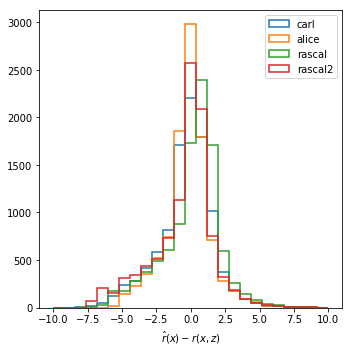

In [19]:
lr_xz = np.log(np.load('data/samples/r_xz_train1.npy')).flatten()

fig = plt.figure(figsize=(5,5))

for i, (lr, label) in enumerate(zip(lr_train, models)):
    plt.hist(lr - lr_xz, histtype='step', range=(-10.,10.), bins=25, color='C' + str(i), lw=1.5, label=label)
    
plt.legend()

plt.xlabel(r'$\hat{r}(x) - r(x,z)$')
plt.tight_layout()
plt.show()

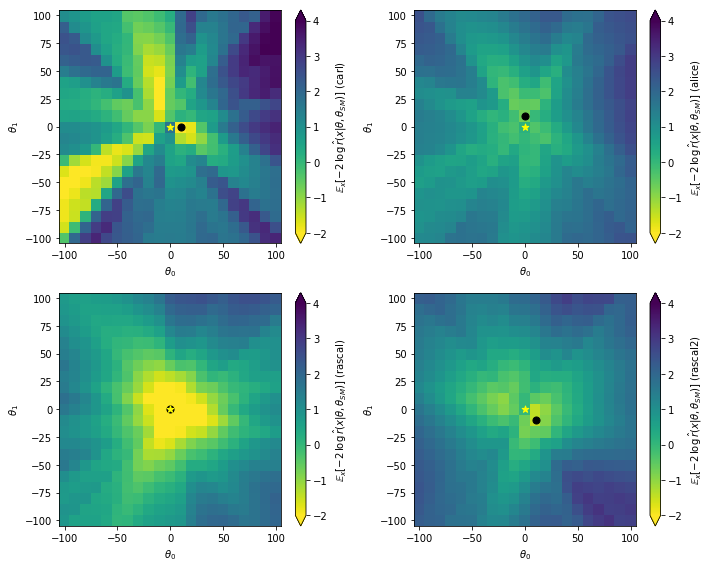

In [43]:
cmin, cmax = -2.,4.

bin_size = theta_each[1] - theta_each[0]
edges = np.linspace(theta_each[0] - bin_size/2, theta_each[-1] + bin_size/2, 21+1)

fig = plt.figure(figsize=(10,8))

for i, (elr, label) in enumerate(zip(expected_llr_test, models)):
    ax = plt.subplot(2,2,i+1)
    
    

    pcm = ax.pcolormesh(edges, edges, -2. * elr.reshape((21,21)),
                        norm=matplotlib.colors.Normalize(vmin=cmin, vmax=cmax),
                        cmap='viridis_r')
    cbar = fig.colorbar(pcm, ax=ax, extend='both')
    
    best_fit = theta_grid[np.argmin(-2.*elr)]
    plt.scatter(best_fit[0], best_fit[1], s=50., color='black', marker='o')
    plt.scatter(0., 0., s=50., color='yellow', marker='*')

    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$\theta_1$')
    cbar.set_label(r'$\mathbb{E}_x [ -2\, \log \,\hat{r}(x | \theta, \theta_{SM}) ]$ (' + label + ')')

plt.tight_layout()
plt.show()
